In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)
from collections import Counter
from nltk.corpus import stopwords
from tqdm import tqdm
import os
import nltk
import re
import string
import codecs
import unidecode
import warnings
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from collections import defaultdict
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import (
    wordnet,
    stopwords
)
warnings.filterwarnings("ignore")
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mufaddal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mufaddal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mufaddal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mufaddal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [34]:
train_data = pd.read_csv('train.csv',encoding='utf-8')

In [35]:
test_data = pd.read_csv('test.csv',encoding='utf-8')

In [36]:
train_data.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [37]:
train_data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller,1
1,1851,"Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw",1
2,2689,"one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot; {link}",2
3,4525,This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork,0
4,3604,Line outside the Apple store in Austin waiting for the new iPad #SXSW {link},1


In [38]:
train_data[train_data.isnull().any(axis=1)]

,tweet_id,tweet,sentiment
1274,6,NaN,1


In [39]:
train_data.dropna(inplace=True)

In [40]:
sentiment_dict = {0:'Negative',1:'Neutral',2:'Positive',3:"""Can't tell"""}
train_data['vis_sentiment'] = train_data['sentiment'].map(sentiment_dict)
train_data.head()

,tweet_id,tweet,sentiment,vis_sentiment
0,1701,#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller,1,Neutral
1,1851,"Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw",1,Neutral
2,2689,"one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot; {link}",2,Positive
3,4525,This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork,0,Negative
4,3604,Line outside the Apple store in Austin waiting for the new iPad #SXSW {link},1,Neutral


In [41]:
temp_vis = train_data.groupby('vis_sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)

temp_vis.style.background_gradient(cmap='Blues')

,vis_sentiment,tweet
2,Neutral,4310
3,Positive,2382
1,Negative,456
0,Can't tell,125


In [42]:
Percentage = ((train_data.groupby('vis_sentiment').count()['tweet'])/7275)*100
Percentage

vis_sentiment
Can't tell    1.718213 
Negative      6.268041 
Neutral       59.243986
Positive      32.742268
Name: tweet, dtype: float64

In [43]:
temp_vis['Percentage'] = Percentage
temp_vis

,vis_sentiment,tweet,Percentage
2,Neutral,4310,NaN
3,Positive,2382,NaN
1,Negative,456,NaN
0,Can't tell,125,NaN


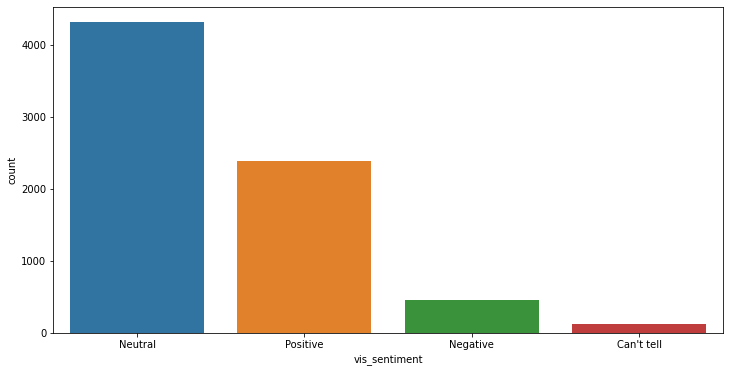

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='vis_sentiment',data=train_data)

In [45]:
train_data['word_count']= train_data['tweet'].apply(lambda x: len(str(x).split()))

In [46]:
def remove_html_encodings(x):
    example1 = BeautifulSoup(x, 'lxml')
    return example1.get_text()

In [47]:
train_data["tweet"] = train_data["tweet"].apply(lambda x: remove_html_encodings(x))

In [48]:
train_data.head(20)

,tweet_id,tweet,sentiment,vis_sentiment,word_count
0,1701,#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller,1,Neutral,12
1,1851,"Learning ab Google doodles! All doodles should be light, funny & innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw",1,Neutral,19
2,2689,"one of the most in-your-face ex. of stealing the show in yrs RT @mention ""At #SXSW, Apple schools the mkt experts"" {link}",2,Positive,22
3,4525,This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork,0,Negative,19
4,3604,Line outside the Apple store in Austin waiting for the new iPad #SXSW {link},1,Neutral,14
5,966,#technews One lone dude awaits iPad 2 at AppleÛªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech,1,Neutral,18
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link} #sxsw #ipad",1,Neutral,12
7,8182,NU user RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by #Mashable,1,Neutral,20
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,Positive,7
9,883,I think I might go all weekend without seeing the same iPad case twice... #sxsw,2,Positive,15


In [49]:
test_data['tweet'] = test_data['tweet'].apply(lambda x: remove_html_encodings(x))

In [50]:
train_data =  train_data[train_data['sentiment'] != 3]

In [51]:
train_data['tweet'] = train_data['tweet'].apply(lambda x:re.sub('[^\s]*sxsw[^\s]*','',x,flags=re.IGNORECASE))

In [52]:
test_data['tweet'] = test_data['tweet'].apply(lambda x:re.sub('[^\s]*sxsw[^\s]*','',x,flags=re.IGNORECASE))
test_data.head()

,tweet_id,tweet
0,7506,"Audience Q: What prototyping tools do you use? Sketchbooks/sharpie pens, photoshop, Balsamic, Google docs, Axsure, etc. #myprototype"
1,7992,At Send Your Best Photos & Videos to... {link} #citizen_journalism #cnn #ireport #photography #Cyber #iPhone
2,247,@mention and here's a pic of you winning your ipad! #unsix cc @mention @mention {link} (cont) {link}
3,7688,Google Marissa Mayer: mobile phone as a cursor of physical location - new version of map fast and more real life like
4,3294,Google maps is even cooler than I thought


In [53]:
def preprocessing_text(table):
    #put everything in lowercase
    table['tweet'] = table['tweet'].str.lower()
    #Replace rt indicating that was a retweet
    table['tweet'] = table['tweet'].str.replace('rt', '')
    #Replace occurences of mentioning @UserNames
    table['tweet'] = table['tweet'].replace(r'@[^\s]+', 'AT_USER', regex=True)
    #Replace links contained in the tweet
    table['tweet'] = table['tweet'].replace(r'((www\.[^\s]+)|(https?://[^\s]+))', 'URL', regex=True)
    #remove numbers
    table['tweet'] = table['tweet'].replace(r'[0-9]+', '', regex=True)
    #replace special characters and puntuation marks
    table['tweet'] = table['tweet'].replace(r'[!"$%&()*+,-./:;<=>?@[\]^_`{|}~]', '', regex=True)
    table['tweet'] = table['tweet'].replace(r'#([^\s]+)', r'\1', regex=True)
    return table

In [54]:
def stop_words(table):
    #We need to remove the stop words
    stop_words_list = stopwords.words('english')
    table['tweet'] = table['tweet'].str.lower()
    table['tweet'] = table['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_list)]))
    return table

In [55]:
def in_dict(word):
    if wordnet.synsets(word):
        #if the word is in the dictionary, we'll return True
        return True

def replace_elongated_word(word):
    regex = r'(\w*)(\w+)\2(\w*)'
    repl = r'\1\2\3'    
    if in_dict(word):
        return word
    new_word = re.sub(regex, repl, word)
    if new_word != word:
        return replace_elongated_word(new_word)
    else:
        return new_word

def detect_elongated_words(row):
    regexrep = r'(\w*)(\w+)(\2)(\w*)'
    words = [''.join(i) for i in re.findall(regexrep, row)]
    for word in words:
        if not in_dict(word):
            row = re.sub(word, replace_elongated_word(word), row)
    return row

In [56]:
def replace_antonyms(word):
    #We get all the lemma for the word
    for syn in wordnet.synsets(word): 
        for lemma in syn.lemmas(): 
            #if the lemma is an antonyms of the word
            if lemma.antonyms(): 
                #we return the antonym
                return lemma.antonyms()[0].name()
    return word

In [57]:
def handling_negation(row):
    #Tokenize the row
    words = word_tokenize(row)
    speach_tags = ['JJ', 'JJR', 'JJS', 'NN', 'VB', 'VBD', 'VBG', 'VBN', 'VBP']
    #We obtain the type of words that we have in the text, we use the pos_tag function
    tags = nltk.pos_tag(words)
    #Now we ask if we found a negation in the words
    tags_2 = ''
    if "n't" in words and "not" in words:
        tags_2 = tags[min(words.index("n't"), words.index("not")):]
        words_2 = words[min(words.index("n't"), words.index("not")):]
        words = words[:(min(words.index("n't"), words.index("not")))+1]
    elif "n't" in words:
        tags_2 = tags[words.index("n't"):]
        words_2 = words[words.index("n't"):] 
        words = words[:words.index("n't")+1]
    elif "not" in words:
        tags_2 = tags[words.index("not"):]
        words_2 = words[words.index("not"):]
        words = words[:words.index("not")+1] 
        
    for index, word_tag in enumerate(tags_2):
        if word_tag[1] in speach_tags:
            words = words+[replace_antonyms(word_tag[0])]+words_2[index+2:]
            break
            
    return ' '.join(words)

In [58]:
def cleaning_table(table):
    #This function will process all the required cleaning for the text in our tweets
    table = preprocessing_text(table)
    table['tweet'] = table['tweet'].apply(lambda x: detect_elongated_words(x))
    table['tweet'] = table['tweet'].apply(lambda x: handling_negation(x))
    table = stop_words(table)
    return table

In [59]:
train_data = cleaning_table(train_data)

In [60]:
test_data = cleaning_table(test_data)

In [61]:
# Creating a dictionary of contractions for contraction to expansion

contraction_mapping = {"aight" : "alright",
 "ain't": "am not",
 "amn't" : "am not",
 "aren't": "are not",
 "can't": "cannot",
 "'cause" : "because",
 "could've": "could have",
 "couldn't" : "could not",
 "couldn't've" : "could not have", 
 "daren't" : "dare not",
 "daresn't" : "dare not",
 "dasn't" : "dare not",
 "didn't" : "did not",
 "doesn't" : "does not",
 "don't" : "do not",
 "d'ye" : "do you",
 "e'er" : "ever",
 "everybody's" : "everybody is",
 "everyone's" : "everyone is",
 "finna":"fixing to",
 "g'day" : "good day",
 "gimme" : "give me",
 "giv'n": "given",
 "gonna":"going to",
 "gon't":"go not",
 "gotta":"got to",
 "hadn't":"had not",
 "had've":"had have",
 "hasn't":"has not",
 "haven't":"have not",
 "he'd":"he would",
 "he'dn't've'd":"he would not have had",
 "he'll":"he will",
 "he's":"he is",
 "he've":"he have",
 "how'd":"how did",
 "howdy":"how do you do",
 "how'll":"how will",
 "how're":"how are",
 "how's":"how has",
 "i'd": "i would",
 "i'd've":"i would have",
 "i'll": "i will",
 "i'm": "i am",
 "i'm'a": "i am about to",
 "i'm'o": "i am going to",
 "innit": "is it not",
 "i've": "i have",
 "isn't": "is not",
 "it'd": "it would",
 "it'll": "it will",
 "it's": "it is",
 "let's": "let us", 
 "ma'am": "madam",
 "mayn't": "may not",
 "may've": "may have",
 "methinks" : "me thinks",
 "mightn't": "might not",
 "might've": "might have",
 "mustn't": "must not",
 "mustn't've": "must not have",
 "must've": "must have",
 "needn't": "need not",
 "ne'er":"never",
 "o'clock": "of the clock",
 "o'er": "over",
 "ol'": "old",
 "oughtn't":"ought not",
 "'s": "is",
 "shalln't":"shall not",
 "shan't":"shall not",
 "she'd":"she would",
 "she'll":"she will",
 "she's":"she is",
 "should've":"should have",
 "shouldn't":"should not",
 "shouldn't've":"should not have",
 "somebody's":"somebody is",
 "someone's":"someone is",
 "something's":"something is",
 "so're":"so you are",
 "that'll":"that will",
 "that're":"that are",
 "that's":"that is",
 "that'd":"that had",
 "there'd":"there would",
 "there'll":"here shall",
 "there're":"there are",
 "there's":"there has",
 "these're":"these are",
 "these've":"these have",
 "they'd":"they would",
 "they'll":"they will",
 "they're":"they are",
 "they've":"they have",
 "this's":"this is",
 "those're":"those are",
 "those've":"those have",
 "'tis":"it is",
 "to've":"to have",
 "'twas":"it was",
 "wanna":"want to",
 "wasn't":"was not",
 "we'd":"we would",
 "we'd've":"we would have",
 "we'll":"we will",
 "we're":"we are",
 "we've":"we have",
 "weren't":"were not",
 "what'd":"what did",
 "what'll":"what will",
 "what're":"what are",
 "what's":"what is",
 "what've":"what have",
 "when's":"when is",
 "where'd":"where did",
 "where'll":"where will",
 "where're":"where are",
 "where's":"where has",
 "where've":"where have",
 "which'd":"which had",
 "which'll":"which shall",
 "which're":"which are",
 "which's":"which has",
 "which've":"which have",
 "who'd":"who would",
 "who'd've":"who would have",
 "who'll":"who will",
 "who're":"who are",
 "who's":"who has",
 "who've":"who have",
 "why'd":"why did",
 "why're":"why are",
 "why's":"why is",
 "won't":"will not",
 "would've":"would have",
 "wouldn't":"would not",
 "wouldn't've":"would not have",
 "y'all":"you all",
 "y'all'd've":"you all would have",
 "y'all'dn't've'd":"you all would not have had",
 "y'all're":"you all are",
 "you'd":"you would",
 "you'll":"you will",
 "you're":"you are",
 "you've":"you have",
  " u " : " you",
 " ur " : " your",
 " n ": " and ",
 " w/ " : " with ",
 " apples ": " apple is "}

In [62]:
def clean_text(text):
    try:
        decoded = unidecode.unidecode(codecs.decode(text, 'unicode_escape'))
    except:
        decoded = unidecode.unidecode(text)
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = re.sub("’", "'", decoded)
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text) #""" removes any words in square brackets"""
    text = re.sub('{link}', '', text) #"""removes {link} from text """
    text = re.sub('@mention','',text) #removes user handles
    text = re.sub('rt','',text) #removes RT as string
    text = re.sub('<.*?>+', '', text) #"""removes any words in <___> """
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #"""removes punctuations """
    
    text = re.sub('\n', '', text) #removes line breaks
    text = re.sub('\w*\d\w*', '', text) #removes words with digits
    text = re.sub(r'(.)\1+', r'\1\1', text) #spell_corrected
    text = text.replace('\r','')
    return text

In [63]:
train_data['cleaned_text'] = train_data['tweet'].apply(lambda x:clean_text(x))
train_data['cleaned_text'] = train_data['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
train_data.loc[0:20,'cleaned_text']

0     apple defining language touch different dialects becoming smaller                                     
1     learning google doodles doodles light funny innovative exceptions significant occasions gogledodle    
2     one inyourface stealing show yrs atuser apple schools mkt expes link                                  
3     iphone would pretty awesome crash mins extended browsing fuckit ilmakeitwork                          
4     line outside apple store austin waiting new ipad link                                                 
5     technews one lone dude awaits ipad appleaas store link technews apple ipad tablets tech               
6     tips prince npr videos toy shopping zuckerberg link ipad                                              
7     user atuser new ubersocial iphone store includes uberguide sponsored mashable                         
8     free sampler itunes link fremusic                                                                     
9     think might w

In [64]:
test_data['cleaned_text'] = test_data['tweet'].apply(lambda x:clean_text(x))
test_data['cleaned_text'] = test_data['cleaned_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
test_data.loc[0:20,'cleaned_text']

0     audience protyping tools use sketchboksharpie pens photoshop balsamic google docs axsure etc myprotype
1     send best photos videos link citizenjournalism irepo photography cyber iphone                         
2     atuser pic winning ipad unsix atuser atuser link cont link                                            
3     google marisa mayer mobile phone cursor physical location new version map fast real life like         
4     google maps even cooler thought                                                                       
5     atuser front atuser popup store last night link                                                       
6     atuser next life coming back ipad women discontinue hands thing                                       
7     google celebrating day style link                                                                     
8     bit weird tending google circle                                                                       
9     atuser launch

In [65]:
train_data['temp_list'] = train_data['cleaned_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,atuser,5505
1,link,3379
2,ipad,2278
3,google,2015
4,apple,1737
5,iphone,1204
6,store,1175
7,new,857
8,austin,774
9,circles,527


In [66]:
def remove_stopword(x):
    stopwords = set(STOPWORDS)
    more_stopwords = {'amp', "quot","via","will"}
    stopwords = stopwords.union(more_stopwords)
    return [y for y in x if y not in stopwords]
train_data['temp_list'] = train_data['temp_list'].apply(lambda x:remove_stopword(x))

In [67]:
top = Counter([item for sublist in train_data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(100))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,link,3379
2,ipad,2278
3,google,2015
4,apple,1737
5,iphone,1204
6,store,1175
7,new,857
8,austin,774
9,circles,527
10,launch,512


In [68]:
Negative_sent = train_data[train_data['sentiment']==0]
Positive_sent = train_data[train_data['sentiment']==2]
Neutral_sent = train_data[train_data['sentiment']==1]
# Canttell_sent = train_data[train_data['sentiment']==3]

In [69]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(100))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,atuser,1704
1,ipad,969
2,link,955
3,apple,700
4,google,565
5,iphone,431
6,store,420
7,new,297
8,austin,230
9,popup,182


In [70]:
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(100))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,ipad,164
2,iphone,128
3,google,117
4,apple,90
5,link,81
6,store,38
7,new,31
8,circles,29
9,design,26
10,austin,23


In [71]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(100))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,link,2343
2,google,1333
3,ipad,1145
4,apple,947
5,store,717
6,iphone,645
7,new,529
8,austin,521
9,circles,401
10,social,383


In [72]:
def generate_ngrams (text,n=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams= zip(*[token[i:] for i in range(n)])
    return[' '.join(ngram) for ngram in ngrams]
N=20

In [73]:
positive_bigrams = defaultdict(int)
negative_bigrams = defaultdict(int)

for tweet in Positive_sent['cleaned_text']:
    for word in generate_ngrams(tweet, n=2):
        positive_bigrams[word] += 1
        
for tweet in Negative_sent['cleaned_text']:
    for word in generate_ngrams(tweet, n=2):
        negative_bigrams[word] += 1
        
positive_bigrams_df = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
negative_bigrams_df = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])


positive_bigrams_df = positive_bigrams_df.sort_values(by = 1,ascending=True)
negative_bigrams_df = negative_bigrams_df.sort_values(by = 1,ascending=True)

In [74]:
positive_trigrams = defaultdict(int)
negative_trigrams = defaultdict(int)

for tweet in Positive_sent['cleaned_text']:
    for word in generate_ngrams(tweet, n=3):
        positive_trigrams[word] += 1
        
for tweet in Negative_sent['cleaned_text']:
    for word in generate_ngrams(tweet, n=3):
        negative_trigrams[word] += 1
        
positive_trigrams_df = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
negative_trigrams_df = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])

positive_trigrams_df = positive_trigrams_df.sort_values(by = 1,ascending=True)
negative_trigrams_df = negative_trigrams_df.sort_values(by = 1,ascending=True)

In [75]:
pd.set_option('display.max_colwidth', -1)
print(train_data.tweet[:10])

0    apple defining language touch different dialects becoming smaller                                    
1    learning ab google doodles doodles light funny innovative exceptions significant occasions gogledodle
2    one inyourface ex stealing show yrs atuser apple schools mkt expes link                              
3    iphone ap would b pretty awesome n't crash mins extended browsing fuckit ilmakeitwork                
4    line outside apple store austin waiting new ipad link                                                
5    technews one lone dude awaits ipad appleûªs store link technews apple ipad tablets tech             
6    tips prince npr videos toy shopping zuckerberg link ipad                                             
7    nu user atuser new ubersocial iphone ap store includes uberguide sponsored mashable                  
8    free sampler itunes link fremusic                                                                    
9    think might go weekend without s

In [76]:
pd.set_option('display.max_colwidth', -1)
print(test_data.tweet[:10])

0    audience q protyping tools use sketchboksharpie pens photoshop balsamic google docs axsure etc myprotype
1    send best photos videos link citizenjournalism cn irepo photography cyber iphone                        
2    atuser 's pic winning ipad unsix cc atuser atuser link cont link                                        
3    google marisa mayer mobile phone cursor physical location new version map fast real life like           
4    google maps even cooler thought                                                                         
5    atuser front atuser popup store last night link                                                         
6    atuser next life 'm coming back ipad women ca n't discontinue hands thing                               
7    google celebrating pi day style link                                                                    
8    hm bit weird tending google circle                                                                      
9    atuse

In [77]:
train_data['tokenized_tweet'] = [nltk.word_tokenize(x) for x in train_data['tweet']]
stemmer = PorterStemmer()
train_data['tokenized_tweet'] = train_data['tokenized_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
train_data['tokenized_tweet'] = train_data['tokenized_tweet'].apply(lambda x: ' '.join(x))
train_data.head()

,tweet_id,tweet,sentiment,vis_sentiment,word_count,cleaned_text,temp_list,tokenized_tweet
0,1701,apple defining language touch different dialects becoming smaller,1,Neutral,12,apple defining language touch different dialects becoming smaller,"[apple, defining, language, touch, different, dialects, becoming, smaller]",appl defin languag touch differ dialect becom smaller
1,1851,learning ab google doodles doodles light funny innovative exceptions significant occasions gogledodle,1,Neutral,19,learning google doodles doodles light funny innovative exceptions significant occasions gogledodle,"[learning, google, doodles, doodles, light, funny, innovative, exceptions, significant, occasions, gogledodle]",learn ab googl doodl doodl light funni innov except signific occas gogledodl
2,2689,one inyourface ex stealing show yrs atuser apple schools mkt expes link,2,Positive,22,one inyourface stealing show yrs atuser apple schools mkt expes link,"[one, inyourface, stealing, show, yrs, atuser, apple, schools, mkt, expes, link]",one inyourfac ex steal show yr atus appl school mkt exp link
3,4525,iphone ap would b pretty awesome n't crash mins extended browsing fuckit ilmakeitwork,0,Negative,19,iphone would pretty awesome crash mins extended browsing fuckit ilmakeitwork,"[iphone, pretty, awesome, crash, mins, extended, browsing, fuckit, ilmakeitwork]",iphon ap would b pretti awesom n't crash min extend brows fuckit ilmakeitwork
4,3604,line outside apple store austin waiting new ipad link,1,Neutral,14,line outside apple store austin waiting new ipad link,"[line, outside, apple, store, austin, waiting, new, ipad, link]",line outsid appl store austin wait new ipad link


In [78]:
test_data['tokenized_tweet'] = [nltk.word_tokenize(x) for x in test_data['tweet']]
stemmer = PorterStemmer()
test_data['tokenized_tweet'] = test_data['tokenized_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
test_data['tokenized_tweet'] = test_data['tokenized_tweet'].apply(lambda x: ' '.join(x))
test_data.head()

,tweet_id,tweet,cleaned_text,tokenized_tweet
0,7506,audience q protyping tools use sketchboksharpie pens photoshop balsamic google docs axsure etc myprotype,audience protyping tools use sketchboksharpie pens photoshop balsamic google docs axsure etc myprotype,audienc q protyp tool use sketchboksharpi pen photoshop balsam googl doc axsur etc myprotyp
1,7992,send best photos videos link citizenjournalism cn irepo photography cyber iphone,send best photos videos link citizenjournalism irepo photography cyber iphone,send best photo video link citizenjourn cn irepo photographi cyber iphon
2,247,atuser 's pic winning ipad unsix cc atuser atuser link cont link,atuser pic winning ipad unsix atuser atuser link cont link,atus 's pic win ipad unsix cc atus atus link cont link
3,7688,google marisa mayer mobile phone cursor physical location new version map fast real life like,google marisa mayer mobile phone cursor physical location new version map fast real life like,googl marisa mayer mobil phone cursor physic locat new version map fast real life like
4,3294,google maps even cooler thought,google maps even cooler thought,googl map even cooler thought


In [79]:
X = train_data['tokenized_tweet']
y = train_data['sentiment']

In [80]:
cv = CountVectorizer(stop_words=['english',"AT_USER","URL","rt","link","hashtags","amp","gt","quot","sxsw","bit","ly"], ngram_range=(1,2))
X = cv.fit_transform(X)

In [81]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=77)

In [82]:
lr = LogisticRegression(random_state=77, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
#print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

0.6657710824161757
              precision    recall  f1-score   support

           0       0.44      0.33      0.38       142
           1       0.74      0.77      0.75      1305
           2       0.57      0.56      0.56       698

    accuracy                           0.67      2145
   macro avg       0.58      0.55      0.56      2145
weighted avg       0.66      0.67      0.67      2145



In [48]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
#print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

NameError: name 'X_train' is not defined

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test,y_pred))

In [83]:
c2_train=cv.fit_transform(train_data.tokenized_tweet).toarray()
print(c2_train.shape)
c2_test=cv.transform(test_data.tokenized_tweet).toarray()
print(c2_test.shape)

(7148, 36853)
(1819, 36853)


In [84]:
y = train_data['sentiment']

In [90]:
from sklearn.metrics import accuracy_score, f1_score
log = LogisticRegression(random_state=77, class_weight='balanced')
log.fit(c2_train, y)
y_pred3 = log.predict(c2_test)
print(f1_score(c2_test, y_pred3, average='weighted'))

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

In [ ]:
#svclassifier = SVC(kernel='linear')
#svclassifier.fit(c2_train, y)
#y_pred3 = svclassifier.predict(c2_test)

In [ ]:
submission = pd.DataFrame({"tweet_id": test_data["tweet_id"],"sentiment": y_pred3})
submission.to_csv(('submission.csv'), index=False)